## Introduction

In [1]:
import pandas as pd
import numpy as np

cars = pd.read_csv("imports-85.data")
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


column names do not match. 'imports-85.data' file does not contain header row.

In [2]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars = pd.read_csv("imports-85.data", names=cols)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
# Select only the columns with continuous values from - https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names
cars.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-rate     float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [4]:
cont_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[cont_cols]

numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


## Data Cleaning

In [5]:
numeric_cars = numeric_cars.replace("?", np.nan).astype(float)
numeric_cars.describe()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [7]:
numeric_cars.shape[0]

205

In [8]:
# our target is 'price' column that we want to predict. let's remove anyr ows with missing 'price' values.
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [9]:
# On the other hand, let's fill in NaN values with column means. 
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

### Normalize all columns from 0 to 1

In [10]:
np.set_printoptions(precision=2, suppress=True)

price_col = numeric_cars['price'] # needs intact
# we use 'Feature Scaling' since we want rang [0,1]
# Reference: https://en.wikipedia.org/wiki/Normalization_(statistics)
numeric_cars = (numeric_cars - numeric_cars.mean()) / (numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col

print(numeric_cars.describe())
numeric_cars.head()

       normalized-losses    wheel-base        length         width  \
count       2.010000e+02  2.010000e+02  2.010000e+02  2.010000e+02   
mean       -4.694973e-18 -2.036514e-15 -3.018868e-15  2.571188e-15   
std         1.675196e-01  1.768620e-01  1.839131e-01  1.796129e-01   
min        -2.984293e-01 -3.555981e-01 -4.940447e-01 -4.776970e-01   
25%        -1.099476e-01 -1.252774e-01 -1.104626e-01 -1.529107e-01   
50%         0.000000e+00 -5.239111e-02 -1.494022e-02 -3.325254e-02   
75%         7.853403e-02  1.050433e-01  1.387911e-01  6.076455e-02   
max         7.015707e-01  6.444019e-01  5.059553e-01  5.223030e-01   

             height   curb-weight   engine-size          bore        stroke  \
count  2.010000e+02  2.010000e+02  2.010000e+02  2.010000e+02  2.010000e+02   
mean  -4.059771e-15  5.896334e-17 -2.347486e-17 -5.382648e-16  2.947994e-15   
std    2.039852e-01  2.006582e-01  1.567805e-01  1.914799e-01  1.504988e-01   
min   -4.972222e-01 -4.141453e-01 -2.485873e-01 -5.64

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.000000,-0.297289,-0.080612,-0.152911,-0.413889,-0.002974,0.011790,0.099492,-0.274716,-0.072767,0.035528,-0.047995,-0.116086,-0.097015,13495.0
1,0.000000,-0.297289,-0.080612,-0.152911,-0.413889,-0.002974,0.011790,0.099492,-0.274716,-0.072767,0.035528,-0.047995,-0.116086,-0.097015,16500.0
2,0.000000,-0.125277,-0.044791,-0.033253,-0.113889,0.103698,0.094809,-0.464793,0.101474,-0.072767,0.236463,-0.047995,-0.171642,-0.123331,16500.0
3,0.219895,0.029242,0.035806,0.026577,0.044444,-0.084820,-0.067455,-0.100508,0.068141,-0.010267,-0.006528,0.156087,-0.032753,-0.018068,13950.0
4,0.219895,0.017580,0.035806,0.043671,0.044444,0.104086,0.034432,-0.100508,0.068141,-0.135267,0.054220,0.156087,-0.199420,-0.228594,17450.0


## Univariate Model

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    # Randomize order of rows in DataFrame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Devide number of rows in half and round
    last_train_row = df.shape[0] // 2
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    # Fit a kNN model using default k values (5)
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Make predictions using model.
    prediction_labels = knn.predict(test_df[[train_col]])
    
    # Calculate and return RMSE
    mse = mean_squared_error(test_df[target_col], prediction_labels)
    rmse = np.sqrt(mse)
    
    return rmse

rmse_results = {}
train_cols = numeric_cars.columns.drop('price')

# For each column (less 'price'), train a model, return RMSE value
# and add to the dictionary 'rmse_results'
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    rmse_results[col] = rmse_val

rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

engine-size          3238.462830
horsepower           4010.414152
curb-weight          4401.118255
highway-mpg          4652.697833
width                4908.609914
city-mpg             4973.940485
length               5429.900973
wheel-base           5460.787788
compression-rate     6610.812153
bore                 6806.695830
normalized-losses    7304.373172
peak-rpm             7678.470979
height               7842.199226
stroke               8005.611387
dtype: float64

### Modified Function to take parameter k

In [12]:
def knn_train_test(train_col, target_col, df, k=5):   
    np.random.seed(1)
    
    # Randomize order of rows in DataFrame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Devide number of rows in half and round
    last_train_row = df.shape[0] // 2
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = list(range(1,k+1,2))
    k_rmse = {}
    
    for kval in k_values:
        # Fit a kNN model using k nearest neighbors
        knn = KNeighborsRegressor(n_neighbors = kval)
        knn.fit(train_df[[train_col]], train_df[target_col])

        # Make predictions using model.
        prediction_labels = knn.predict(test_df[[train_col]])

        # Calculate and return RMSE
        mse = mean_squared_error(test_df[target_col], prediction_labels)
        rmse = np.sqrt(mse)
        
        k_rmse[kval] = rmse
        
    return k_rmse

k_rmse_results = {}

# For each column (less 'price'), train a model, return RMSE value
# and add to the dictionary 'rmse_results'
train_cols = numeric_cars.columns.drop('price')
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars, k=9)
    k_rmse_results[col] = rmse_val

k_rmse_results

{'bore': {1: 8602.5884845006603,
  3: 6984.2394894809158,
  5: 6806.6958300755823,
  7: 6939.1058456518022,
  9: 6915.2973750134106},
 'city-mpg': {1: 5863.1909434713079,
  3: 4672.77285307275,
  5: 4973.9404846610796,
  7: 5413.3908826775387,
  9: 5277.1766643494775},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.0636855783587,
  5: 6610.8121531591287,
  7: 6732.8012829415147,
  9: 7024.4855254634349},
 'curb-weight': {1: 5288.0195725810245,
  3: 5022.3180117572329,
  5: 4401.1182547931239,
  7: 4330.6701276238755,
  9: 4633.4258799947584},
 'engine-size': {1: 3438.1935908725141,
  3: 2840.5628056435012,
  5: 3238.4628296477176,
  7: 3584.5638791177162,
  9: 3838.2315452483444},
 'height': {1: 8942.0129519959519,
  3: 8378.2338527728607,
  5: 7842.199225717336,
  7: 7709.0699416548505,
  9: 7777.1734491607085},
 'highway-mpg': {1: 6022.8667247547837,
  3: 4671.3903897894661,
  5: 4652.6978325259934,
  7: 4817.2301043607267,
  9: 5261.877043557105},
 'horsepower': {1: 4170.0548

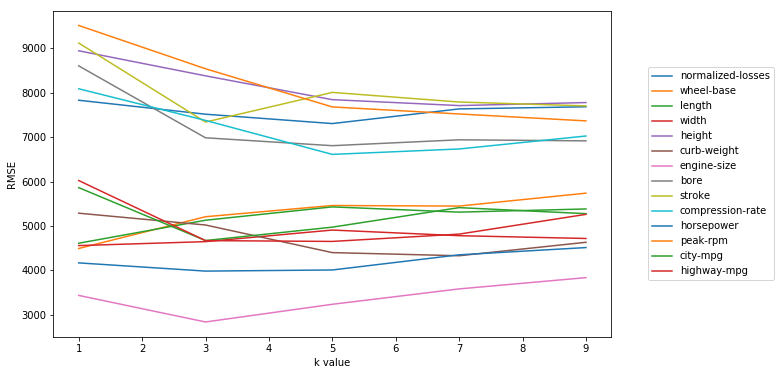

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))
min_ks = dict() # optimal k holder

for k,v in k_rmse_results.items():
    series = pd.Series(v)
    min_ks[k] = series.idxmin() # get min id of k
    series.plot(label=k)
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend(loc='center right', bbox_to_anchor=(1.3, .5), ncol = 1)
plt.show()

In [14]:
min_ks # optimal k when univariate

{'bore': 5,
 'city-mpg': 3,
 'compression-rate': 5,
 'curb-weight': 7,
 'engine-size': 3,
 'height': 7,
 'highway-mpg': 5,
 'horsepower': 3,
 'length': 1,
 'normalized-losses': 5,
 'peak-rpm': 9,
 'stroke': 3,
 'wheel-base': 1,
 'width': 1}

## Multivariate Model

In [15]:
# compute average RMSE across different 'k' values for each feature.
feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse

normalized-losses    7592.985593
wheel-base           5269.942030
length               5173.300277
width                4723.406333
height               8129.737884
curb-weight          4735.110369
engine-size          3388.002930
bore                 7249.585405
stroke               7990.349767
compression-rate     7166.073599
horsepower           4206.276166
peak-rpm             8122.477154
city-mpg             5240.094366
highway-mpg          5085.212419
dtype: float64

In [16]:
def knn_train_test(train_cols, target_col, df, ):   
    np.random.seed(1)
    
    # Randomize order of rows in DataFrame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # Devide number of rows in half and round
    last_train_row = df.shape[0] // 2
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = list(range(1,25))
    k_rmse = {}
    
    for kval in k_values:
        # Fit a kNN model using k nearest neighbors
        knn = KNeighborsRegressor(n_neighbors = kval)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        prediction_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE
        mse = mean_squared_error(test_df[target_col], prediction_labels)
        rmse = np.sqrt(mse)
        
        k_rmse[kval] = rmse
        
    return k_rmse

k_rmse_results = {}

two_best_features = ['horsepower', 'width']
rmse_val = knn_train_test(two_best_features, 'price', numeric_cars)
k_rmse_results["two best features"] = rmse_val

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test(three_best_features, 'price', numeric_cars)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse_val = knn_train_test(four_best_features, 'price', numeric_cars)
k_rmse_results["four best features"] = rmse_val

five_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg', 'highway-mpg']
rmse_val = knn_train_test(five_best_features, 'price', numeric_cars)
k_rmse_results["five best features"] = rmse_val

six_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg', 'highway-mpg', 'length']
rmse_val = knn_train_test(six_best_features, 'price', numeric_cars)
k_rmse_results['six best features'] = rmse_val

k_rmse_results

{'five best features': {1: 2530.0554077602005,
  2: 2897.1757974767684,
  3: 3183.4597426217424,
  4: 3168.0230415758415,
  5: 3341.6024539726504,
  6: 3537.5205429981911,
  7: 3817.3718358946267,
  8: 4004.4145296855731,
  9: 3992.3186041830318,
  10: 4138.7287878533352,
  11: 4342.0528528290979,
  12: 4416.1453810311359,
  13: 4493.8798141857205,
  14: 4463.5016015545707,
  15: 4474.480783207805,
  16: 4553.5595362768345,
  17: 4597.001081375769,
  18: 4655.283442648355,
  19: 4687.9008939828218,
  20: 4712.0229855431653,
  21: 4755.8566258237734,
  22: 4788.162720030673,
  23: 4806.9233819650544,
  24: 4879.983352195467},
 'four best features': {1: 2516.5892799502258,
  2: 2811.1727257604443,
  3: 3013.3615157930335,
  4: 3126.2694826412612,
  5: 3280.3807311630976,
  6: 3479.5099401018138,
  7: 3781.5612742414464,
  8: 3988.8669577450623,
  9: 4024.9986213622451,
  10: 4042.2472261878988,
  11: 4230.3352486840677,
  12: 4354.0086751540612,
  13: 4461.6266648777882,
  14: 4468.02984

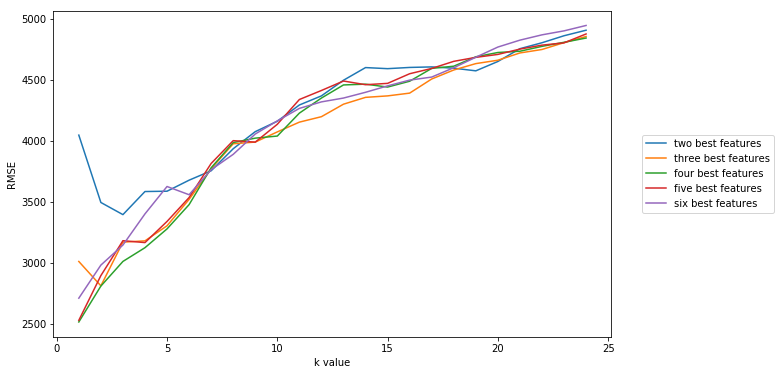

In [17]:
fig, ax = plt.subplots(figsize=(10,6))
min_ks = dict() # optimal k holder

for k,v in k_rmse_results.items():
    series = pd.Series(v)
    min_ks[k] = series.idxmin() # get min id of k
    series.plot(label=k)
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend(loc='center right', bbox_to_anchor=(1.3, .5), ncol = 1)
plt.show()

In [18]:
min_ks # optimal k when multivariate

{'five best features': 1,
 'four best features': 1,
 'six best features': 1,
 'three best features': 2,
 'two best features': 3}

In [19]:
feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse

two best features      4270.631979
three best features    4089.929411
four best features     4096.783373
five best features     4134.892717
six best features      4157.053170
dtype: float64